### Import Modules

In [5]:
# import modules we will be needing for the project
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [6]:
# Load project dataset and save in a variable
movie_df = pd.read_csv ("./IMDB-Movie-Data.csv", delimiter=",")

### Explore Data

In [7]:
movie_df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [8]:
print("This dataset contains {} rows, and {} columns.".format(movie_df.shape[0],movie_df.shape[1])) # returns number of rows and columns

This dataset contains 1000 rows, and 12 columns.


In [9]:
movie_df.info() # returns info about the dataset columns such as datatype, index, header and non_null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [10]:
movie_df.describe() # returns some descriptive statistics about the dataset

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Data Cleaning

Handle Duplicate Values

In [11]:
# check first for the length of the dataset
print("The length of the dataset initially is",len(movie_df))

The length of the dataset initially is 1000


In [12]:
movie_df[movie_df.duplicated()] #check for duplicate rows returns no duplicate rows in the dataset

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [13]:
movie_df["Title"].describe()   #Inspection of the 'Title' column shows the movie 'The Host' appears twice.

count         1000
unique         999
top       The Host
freq             2
Name: Title, dtype: object

In [14]:
movie_df[movie_df.duplicated(subset="Title")]   # Further check for duplicates under 'Title' column

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.2,85.0


In [15]:
movie_df.drop_duplicates(subset='Title', inplace=True)
print("Length of dataset after checking for duplicates is",len(movie_df))

Length of dataset after checking for duplicates is 999


In [16]:
print("Note: There are no duplicates rows in the dataset, but under column 'TItle', the movie 'The Host' appeared twice.")

Note: There are no duplicates rows in the dataset, but under column 'TItle', the movie 'The Host' appeared twice.


Renaming Columns

In [17]:
print(movie_df.columns)
movie_df.rename(columns= {
    "Runtime (Minutes)":"Runtime",
    "Revenue (Millions)":"Revenue"
}, inplace=True)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


Dealing With Null Values

In [18]:
movie_df.isnull().sum() # returns the sum of rows with null values per column

Rank             0
Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

1. Replace the null Revenue values with mean revenue calculated 

In [19]:
# Calculate the mean Revenue
avg_revenue = np.round(movie_df.Revenue.mean(),2)
print(avg_revenue)

# Fill the missing revenue values with the average revenue value calculated
movie_df.Revenue.fillna(avg_revenue, inplace=True)

83.05


2. Replace the null Metascore values with mean metascore value calculated

In [20]:
# Calculate the mean Metascore
avg_metascore = np.round(movie_df.Metascore.mean(),2)
print(avg_metascore)

# Fill the missing metascore values with the average metascore value calculated
movie_df.Metascore.fillna(avg_metascore, inplace=True)

58.96


In [21]:
# Check for null values shows there are no more null values
movie_df.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

### Check Correlation of Continuous Data

In [22]:
movie_df.iloc[:,[0,6,7,8,9,10,11]].corr()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
Rank,1.000000,-0.261247,-0.221944,-0.219722,-0.283708,-0.252703,-0.186138
Year,-0.261247,1.000000,-0.164510,-0.211081,-0.413969,-0.119567,-0.073020
Runtime,-0.221944,-0.164510,1.000000,0.392150,0.407327,0.248170,0.201939
Rating,-0.219722,-0.211081,0.392150,1.000000,0.511776,0.189766,0.605041
Votes,-0.283708,-0.413969,0.407327,0.511776,1.000000,0.607710,0.319390
Revenue,-0.252703,-0.119567,0.248170,0.189766,0.607710,1.000000,0.133821
Metascore,-0.186138,-0.073020,0.201939,0.605041,0.319390,0.133821,1.000000


<Axes: >

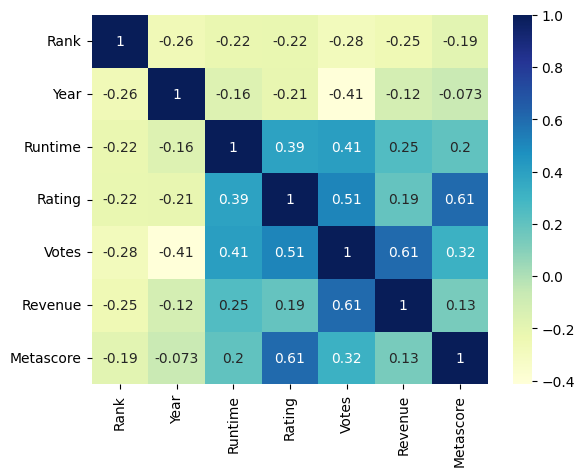

In [23]:
sns.heatmap(movie_df.iloc[:,[0,6,7,8,9,10,11]].corr(), cmap="YlGnBu", annot=True)

In [24]:
movie_df.describe() # returns some descriptive statistics about the dataset

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000
mean,500.367367,2012.789790,113.165165,6.722923,1.699047e+05,83.049209,58.957397
std,288.933628,3.200366,18.819088,0.945862,1.888326e+05,96.426416,16.622783
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.500000,2010.000000,100.000000,6.200000,3.630600e+04,17.505000,47.500000
50%,500.000000,2014.000000,111.000000,6.800000,1.108250e+05,60.440000,58.960000
75%,750.500000,2016.000000,123.000000,7.400000,2.400475e+05,99.455000,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


#### Analysis
1. In what year is the Highest Revenue Generated?
2. Top 10 Revenue Generated by Each Genre
3. What Movies Generated the Highest Revenue
4. The Top 10 Highest Revennue Generated Movies
5. The Top 10 Highest Revenue Genenerated Directors
6. Average Revenue by Year
7. Relationship of Revenue to Rating
8. Distribution of Movies by Rating

### Define a Column: Rating Category

In [25]:
# define rating function
def define_rating(x):
    if x >= 8.0:
        return "Excellent"
    elif x >= 4.0 and x < 8.0:
        return "Good"
    else:
        return "Poor"

In [26]:
# apply function to Rating column

movie_df["Rating Category"] = movie_df["Rating"].apply(define_rating)

movie_df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


1. Revenue generated per year

Text(0.5, 1.0, 'revenue Generated Per Year')

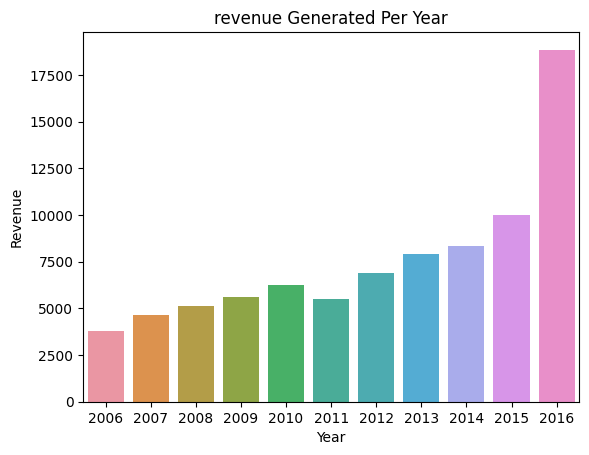

In [27]:
revenue_gen = movie_df.groupby(["Year"], as_index= False)["Revenue"].sum().sort_values(by="Year", ascending=False)

sns.barplot(x="Year", y= "Revenue", data= revenue_gen)

plt.title("revenue Generated Per Year")

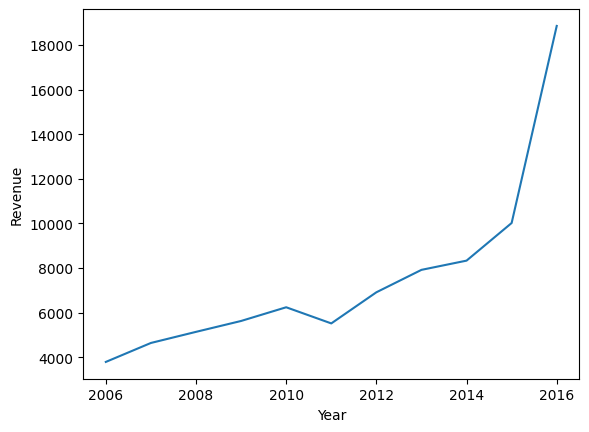

In [28]:
sns.lineplot(x="Year", y="Revenue", data=revenue_gen);

In [29]:
print("The year with the highest generated revenue is {}.".format(int(revenue_gen.loc[:].max()[0])))

The year with the highest generated revenue is 2016.


2. Top 10 revenue generated per genre

In [30]:
top_10_revenue_by_genre = movie_df.groupby(["Genre"])["Revenue"].sum().sort_values(ascending=False)[:10]
top_10_revenue_by_genre

Genre
Action,Adventure,Sci-Fi       10461.51
Animation,Adventure,Comedy     5837.80
Action,Adventure,Fantasy       5331.34
Comedy                         2440.11
Drama                          2265.79
Adventure,Family,Fantasy       2201.47
Animation,Action,Adventure     1759.26
Action,Adventure,Thriller      1739.36
Comedy,Drama,Romance           1496.72
Comedy,Romance                 1468.26
Name: Revenue, dtype: float64

Text(0, 0.5, 'Revenue')

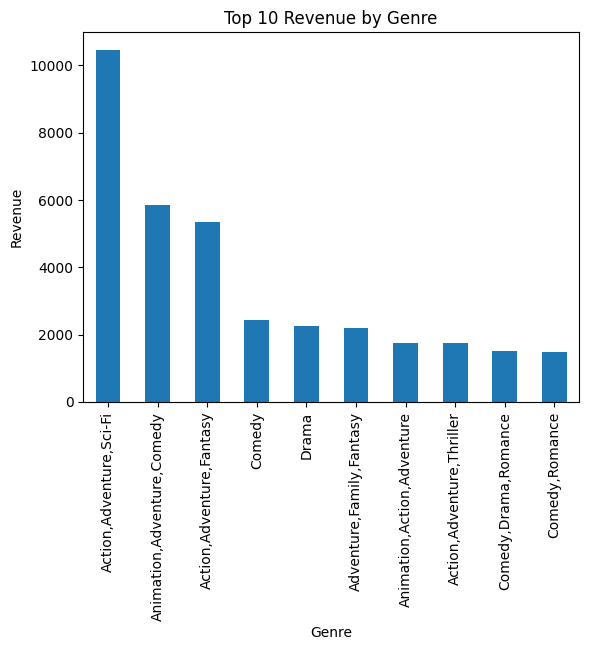

In [41]:
top_10_revenue_by_genre.plot(kind="bar");
plt.title("Top 10 Revenue by Genre")
plt.ylabel("Revenue")

4. Movies that generated the top 10 revenues

In [32]:
top_10_revenue_by_movies = movie_df.groupby(["Title"])["Revenue"].sum().sort_values(ascending=False)[:10]
top_10_revenue_by_movies

Title
Star Wars: Episode VII - The Force Awakens    936.63
Avatar                                        760.51
Jurassic World                                652.18
The Avengers                                  623.28
The Dark Knight                               533.32
Rogue One                                     532.17
Finding Dory                                  486.29
Avengers: Age of Ultron                       458.99
The Dark Knight Rises                         448.13
The Hunger Games: Catching Fire               424.65
Name: Revenue, dtype: float64

Text(0, 0.5, 'Revenue')

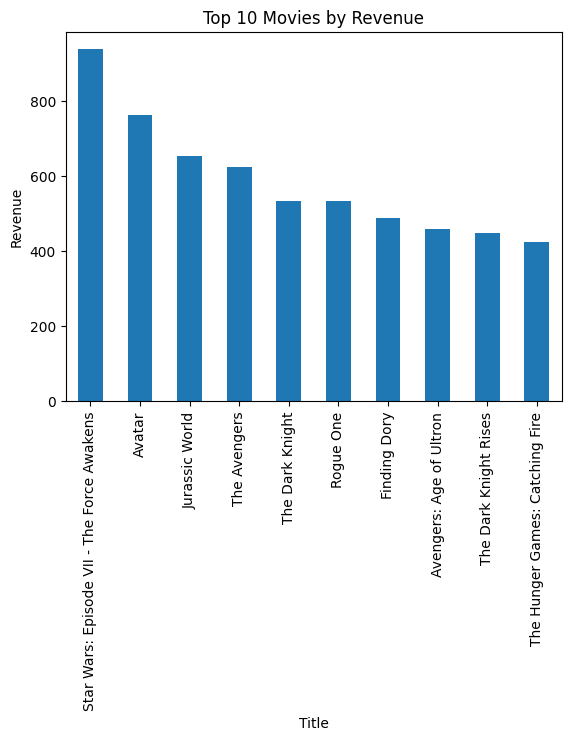

In [42]:
top_10_revenue_by_movies.plot(kind="bar")
plt.title("Top 10 Movies by Revenue");
plt.ylabel("Revenue")

5. Top 10 revenue generating directors

In [34]:
top_10_revenue_by_directors = movie_df.groupby(["Director"])["Revenue"].sum().sort_values(ascending=False)[:10]
top_10_revenue_by_directors

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder           975.74
Peter Jackson         860.45
Gore Verbinski        829.82
Name: Revenue, dtype: float64

Text(0, 0.5, 'Revenue')

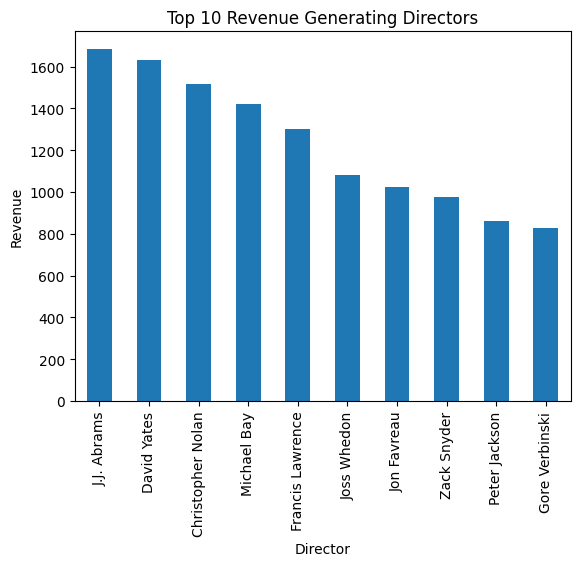

In [43]:
top_10_revenue_by_directors.plot(kind="bar")
plt.title("Top 10 Revenue Generating Directors");
plt.ylabel("Revenue")

6. Average revenue per year

In [46]:
avg_revenue_gen = movie_df.groupby(["Year"], as_index= False)["Revenue"].mean().sort_values(by="Year", ascending=False)
avg_revenue_gen

,Year,Revenue
10,2016,63.475589
9,2015,78.872598
8,2014,84.995918
7,2013,86.987582
6,2012,107.973281
5,2011,87.539841
4,2010,103.980000
3,2009,110.283529
2,2008,98.774423
1,2007,87.517547


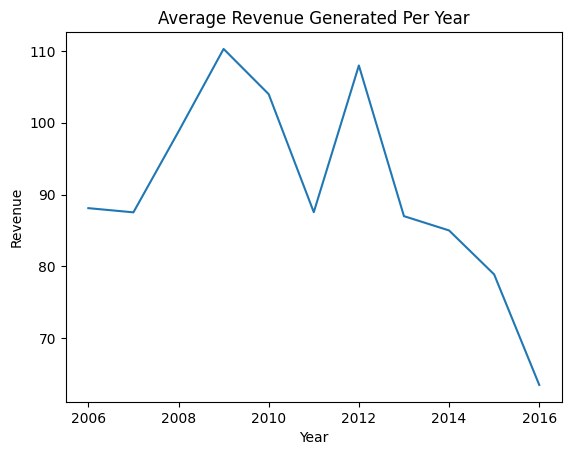

In [45]:
sns.lineplot(x="Year", y="Revenue", data=avg_revenue_gen)
plt.title("Average Revenue Generated Per Year");

7. Relationship between revenue and rating

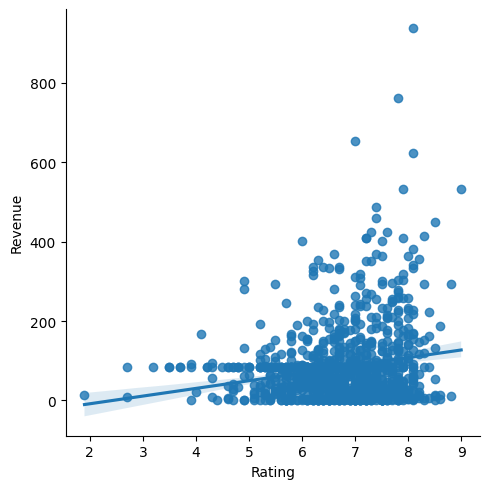

In [38]:
sns.lmplot(x = "Rating", y ="Revenue", data=movie_df)
plt.show()

8. Distribution of movies by rating categories

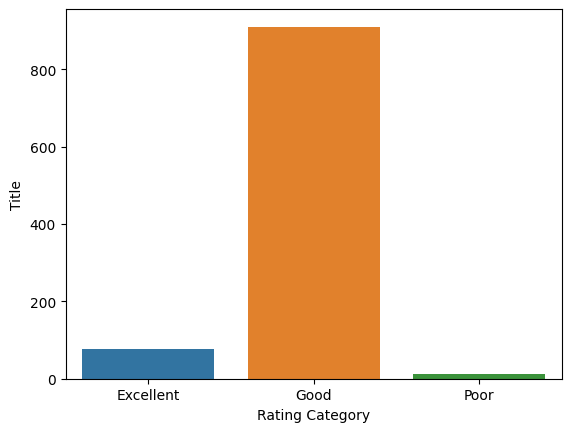

In [39]:
movies_by_rating = movie_df.groupby(["Rating Category"], as_index=False)["Title"].count()
sns.barplot(x="Rating Category", y="Title", data=movies_by_rating);